## Reviews Analysis using NLP

<img src="https://ksassets.timeincuk.net/wp/uploads/sites/54/2017/09/New_Echo_2-920x470.jpg" width="700px">

**Importing some Basic Libraries**

In [1]:
# for basic operations
import numpy as np
import pandas as pd

# for basic visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for advanced visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

**Reading the data**

In [2]:
data = pd.read_csv('amazon_alexa.tsv', delimiter = '\t', quoting = 3)

# getting the shape of the data
data.shape

(3150, 5)

In [3]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
# describing the data set

data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [5]:
# checking if there is any null data or not

data.isnull().any()

rating              False
date                False
variation           False
verified_reviews    False
feedback            False
dtype: bool

**Describing the data according to the Length of the reviews**

In [6]:
# adding a length column for analyzing the length of the reviews

data['length'] = data['verified_reviews'].apply(len)

data.groupby('length').describe().sample(10)

feedback                                               rating  \
          count      mean       std  min   25%  50%  75%  max  count   
length                                                                 
276         4.0  0.750000  0.500000  0.0  0.75  1.0  1.0  1.0    4.0   
583         1.0  1.000000       NaN  1.0  1.00  1.0  1.0  1.0    1.0   
129         7.0  1.000000  0.000000  1.0  1.00  1.0  1.0  1.0    7.0   
131         8.0  1.000000  0.000000  1.0  1.00  1.0  1.0  1.0    8.0   
353         1.0  1.000000       NaN  1.0  1.00  1.0  1.0  1.0    1.0   
142         6.0  0.833333  0.408248  0.0  1.00  1.0  1.0  1.0    6.0   
282         4.0  1.000000  0.000000  1.0  1.00  1.0  1.0  1.0    4.0   
335         2.0  1.000000  0.000000  1.0  1.00  1.0  1.0  1.0    2.0   
562         1.0  1.000000       NaN  1.0  1.00  1.0  1.0  1.0    1.0   
382         2.0  1.000000  0.000000  1.0  1.00  1.0  1.0  1.0    2.0   

                                                      
            mean       std  min   25%  50%  75%  max  
length                                                
276     4.000000  2.000000  1.0  4.00  5.0  5.0  5.0  
583     4.000000       NaN  4.0  4.00  4.0  4.0  4.0  
129     4.714286  0.487950  4.0  4.50  5.0  5.0  5.0  
131     4.875000  0.353553  4.0  5.00  5.0  5.0  5.0  
353     5.000000       NaN  5.0  5.00  5.0  5.0  5.0  
142     4.333333  1.632993  1.0  5.00  5.0  5.0  5.0  
282     4.750000  0.500000  4.0  4.75  5.0  5.0  5.0  
335     5.000000  0.000000  5.0  5.00  5.0  5.0  5.0  
562     5.000000       NaN  5.0  5.00  5.0  5.0  5.0  
382     5.000000  0.000000  5.0  5.00  5.0  5.0  5.0

**Describing the data according to the ratings**

In [7]:
data.groupby('rating').describe()

feedback                                     length              \
          count mean  std  min  25%  50%  75%  max   count        mean   
rating                                                                   
1         161.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   161.0  195.658385   
2          96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    96.0  250.020833   
3         152.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   152.0  208.098684   
4         455.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   455.0  179.338462   
5        2286.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  2286.0  109.006562   

                                                       
               std  min    25%    50%     75%     max  
rating                                                 
1       212.928219  1.0  36.00  120.0  284.00  1126.0  
2       270.179472  1.0  78.75  165.0  311.25  1688.0  
3       272.582517  1.0  54.00  131.0  286.00  1956.0  
4       216.415268  1.0  34.50  100.0  242.00  1362.0  
5       152.505019  1.0  27.00   65.0  136.00  2853.0

**Describing the data according to the feedback**

In [8]:
data.groupby('feedback').describe()

length                                                           \
           count        mean         std  min   25%    50%    75%     max   
feedback                                                                    
0          257.0  215.964981  236.895519  1.0  53.0  137.0  291.0  1688.0   
1         2893.0  125.274456  175.036515  1.0  29.0   70.0  155.0  2853.0   

          rating                                               
           count      mean       std  min  25%  50%  75%  max  
feedback                                                       
0          257.0  1.373541  0.484688  1.0  1.0  1.0  2.0  2.0  
1         2893.0  4.737643  0.546544  3.0  5.0  5.0  5.0  5.0

## Data Visualizations

In [9]:
ratings = data['rating'].value_counts()

label_rating = ratings.index
size_rating = ratings.values

colors = ['pink', 'lightblue', 'aqua', 'gold', 'crimson']

rating_piechart = go.Pie(labels = label_rating,
                         values = size_rating,
                         marker = dict(colors = colors),
                         name = 'Alexa', hole = 0.3)

df = [rating_piechart]

layout = go.Layout(
           title = 'Distribution of Ratings for Alexa')

fig = go.Figure(data = df,
                 layout = layout)

py.iplot(fig)

By looking at the above pie chart, we can infer that most of the Ratings are good for alexa. Around 72.6% people have given Alexa 5 Star rating, which is very good. 14.4% people have given Alexa a 4 Star Rating, which is also good. that means 72.6+14.4 = 87% people have given alexa good rating.
- 4.83% people have given alexa an average rating of 3 stars.
- 3.05% people did not like alexa and chose to give only 2 star ratings to alexa whereas 5.11% people hated alexa and decided to give alexa only 1 Star Rating. This a total of 3.05+5.11 = 8.16% people did not like alexa.

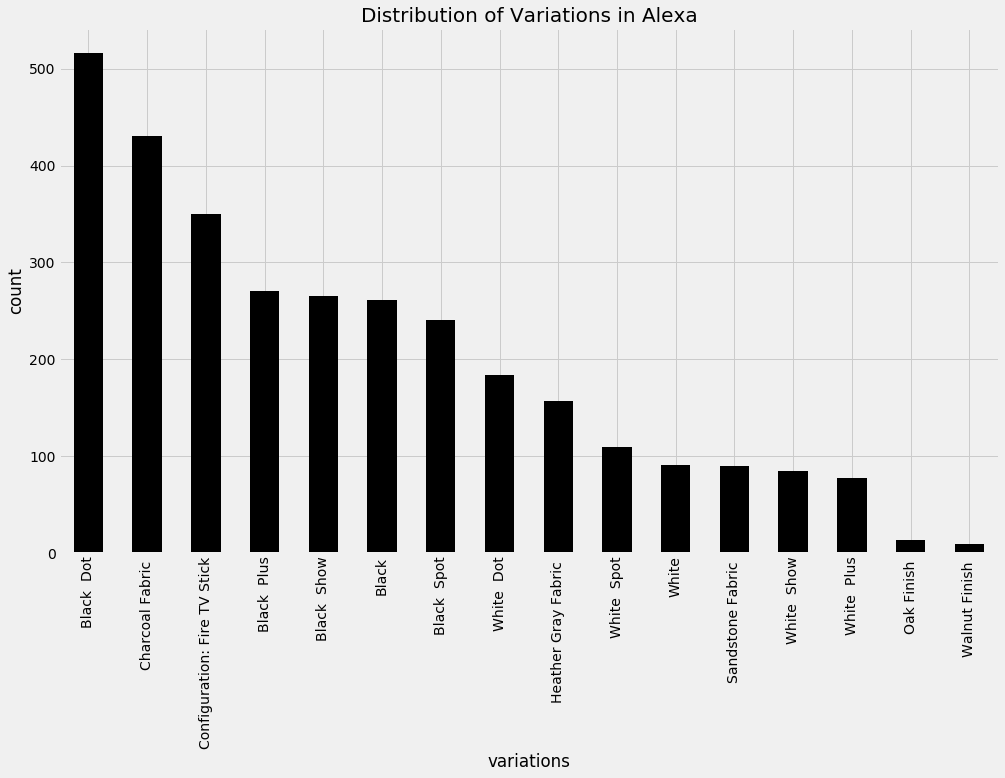

In [10]:
color = plt.cm.copper(np.linspace(0, 1, 15))
data['variation'].value_counts().plot.bar(color = color, figsize = (15, 9))
plt.title('Distribution of Variations in Alexa', fontsize = 20)
plt.xlabel('variations')
plt.ylabel('count')
plt.show()

The above Bar plot, plots the different Variatios of Amazon Alexa with their popularity or no. of counts. It is quite clear that Black Dot is the most popular variation of Amazon Alexa with more than 500 units out of 3150 samples, which is really good.
- Charcoal Fabric and Configuration: Fire TV Stick are also good and very much popular after Black dot.
- Whereas Oak Fish and Walnut Finish are very Unpopular with less than 10 entries.

In [11]:
feedbacks = data['feedback'].value_counts()

label_feedback = feedbacks.index
size_feedback = feedbacks.values

colors = ['yellow', 'lightgreen']

feedback_piechart = go.Pie(labels = label_feedback,
                         values = size_feedback,
                         marker = dict(colors = colors),
                         name = 'Alexa', hole = 0.3)

df2 = [feedback_piechart]

layout = go.Layout(
           title = 'Distribution of Feedbacks for Alexa')

fig = go.Figure(data = df2,
                 layout = layout)

py.iplot(fig)

Here again we are going to analyze the Pie Chart representing the Distribution of feedback for Amazon Alexa which says that around 92% people gave a positive feedback to Amazon Alexa and only 8% people gave negative feedback to Amazon Alexa. This Suggests that Amazon Alexa is a popular product amongst so many people and only few people did not like it for some unforeseeable factors.

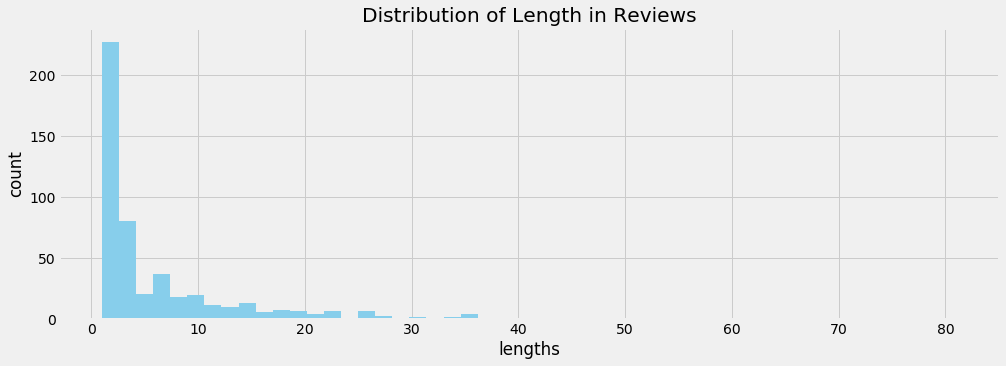

In [12]:
data['length'].value_counts().plot.hist(color = 'skyblue', figsize = (15, 5), bins = 50)
plt.title('Distribution of Length in Reviews')
plt.xlabel('lengths')
plt.ylabel('count')
plt.show()

The above Distribution Plot, shows a distribution of Length of the Reviews written by the people. This is to show on an average what is the length of the reviews written by the people for amazon alexa. Most of the Reviews are so short that is only One or Two words longer. We can see that most people write reviwes that is 5-20 words longer. Very few people write longer reviews such as 70-80 words.

**Let's Check some of the reviews according to thier lengths**

In [13]:
data[data['length'] == 1]['verified_reviews'].iloc[0]

'😍'

In [14]:
data[data['length'] == 21]['verified_reviews'].iloc[0]

'Good sound works well'

In [15]:
data[data['length'] == 50]['verified_reviews'].iloc[0]

'Yet another Exho for our home and love them all!!!'

In [16]:
data[data['length'] == 150]['verified_reviews'].iloc[0]

'"Love my Echo. Still learning all the things it will do. Wasn’t able to follow instructions included in the package, but found a great one on U-Tube."'

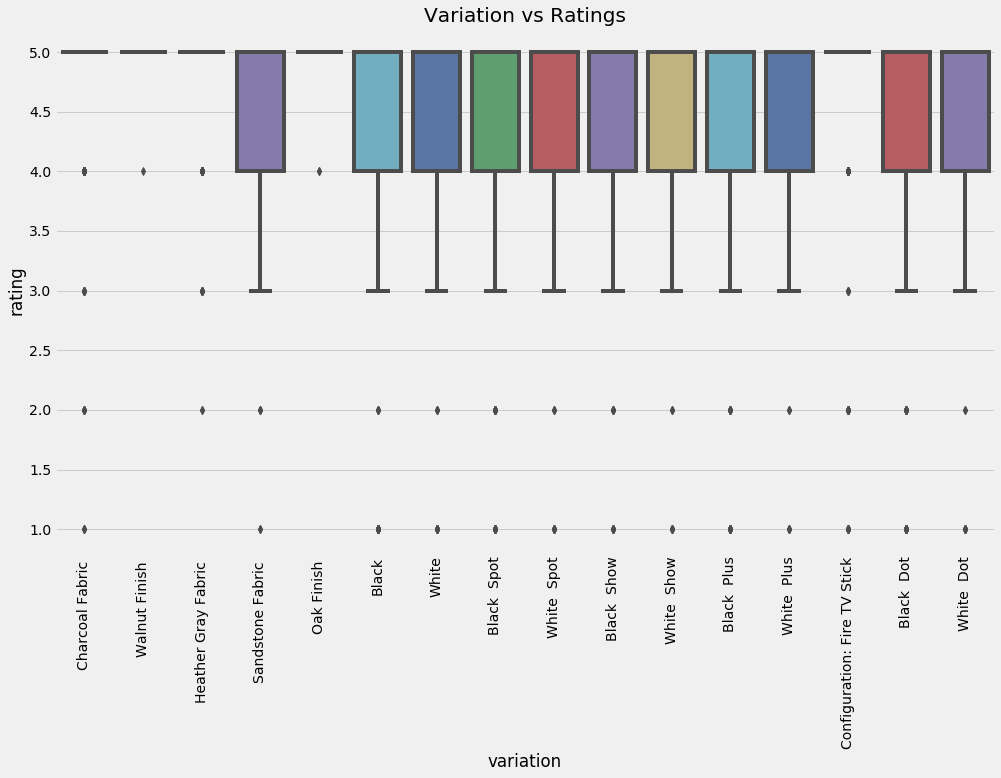

In [22]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.boxplot(data['variation'], data['rating'], palette = 'deep')
plt.title("Variation vs Ratings")
plt.xticks(rotation = 90)
plt.show()

The above Bivariate plot, which plots Variation and ratings to check which of the Variation of Amazon Alexa has been perfoeming best in terms of ratings.

Walnut finish and Oak Finish have very high ratings, the ratings rangee from 4.5 to 5 which is really impressive, These variation are rare and have high reviews.

White and Black Variations for Amazon Alexa have low ratings also, as it is the most common variation available for the product that is the reason, why it has ratings varying from 0 to 5.

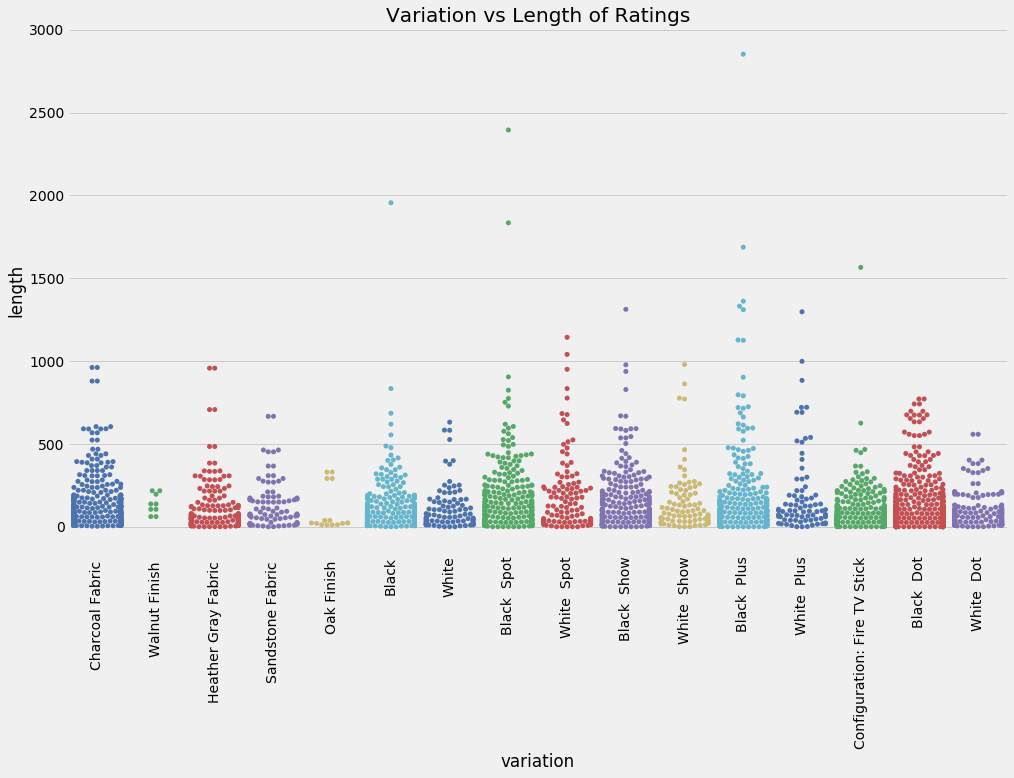

In [23]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.swarmplot(data['variation'], data['length'], palette = 'deep')
plt.title("Variation vs Length of Ratings")
plt.xticks(rotation = 90)
plt.show()

The above Bivariate plot shows swarmplot between Variation in Amazon Alexa and Length of the Reviews. We would like to see for which of the model variations of Amaozn Alexa people have written the longest reviews.

By looking at the graph, we can easily spot that the longest review was written for Black Plus.
Then Black Spot has two long reviews and Black, and Black plus variation also has a very long review.
We might conclude that the longest reviews are all written for the Black-type variations in Amazon Alexa.

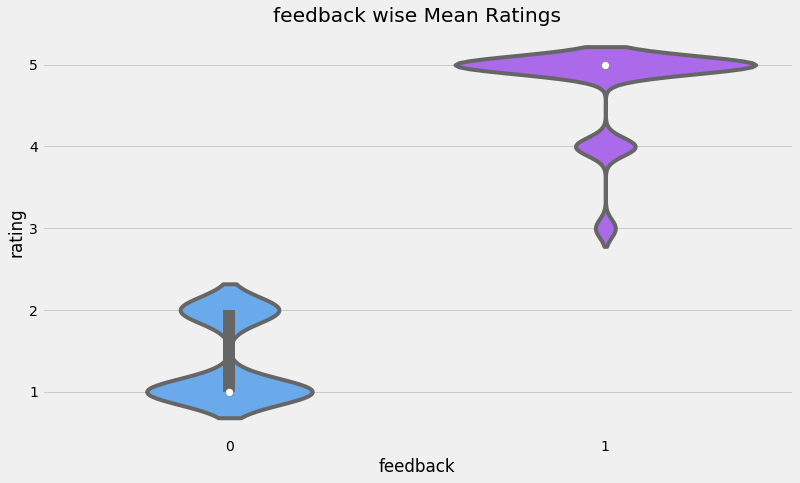

In [24]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('fivethirtyeight')

sns.violinplot(data['feedback'], data['rating'], palette = 'cool')
plt.title("feedback wise Mean Ratings")
plt.show()

The above Bi-variate plot, shows a violin plot between Feedback and Rating, We can easily conclude that the Products which have 0 feedback have lower ratings ranging from 1 to 2 (more probably Rating is 1) whereas for the products having a feedback value 1, has ratings ranging from 3 to 5(more probably rating is 5).

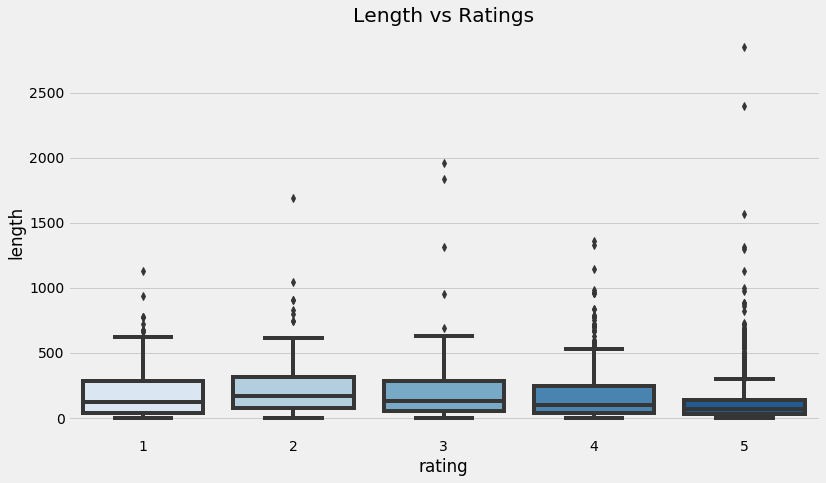

In [25]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('fivethirtyeight')

sns.boxplot(data['rating'], data['length'], palette = 'Blues')
plt.title("Length vs Ratings")
plt.show()

The above Bivariate plot shows a plot between Rating and Length, We would like to that how much a user is gonna write if he/she is going to give a low rating or a high rating to the product.

We can see that most of the people who gave 5 star rating to Alexa wrote a very small review in comparison to the people who did not give alexa a 5 star rating. But, the longest reviews are written for the 5 star ratings only.

The people who gave alexa, a low rating such as 1 or 2 star rating did not consider writing a longer review maybe because they do not like the product.

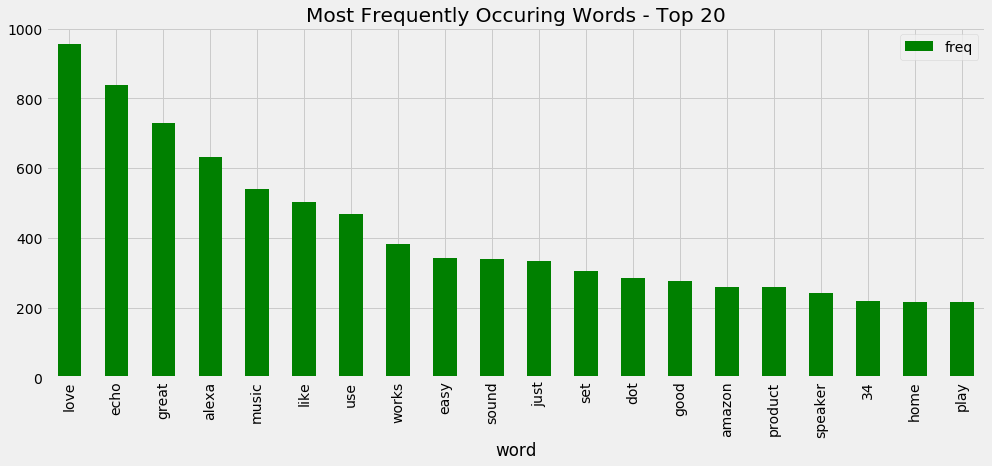

In [26]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.verified_reviews)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words - Top 20")
plt.show()

The Above Bar plot represents the most frequnt words in the reviews so that we can get a rough idea about the reviews and what people think of the product.

We can see that love is the most frequent word in the word suggesting that most of the people absolutely love alexa. Other frequent words that suggest alexa is doing well are amazing, like, great, works etc.


In [28]:
! pip install wordcloud
from wordcloud import WordCloud

    100% |████████████████████████████████| 368kB 21.5MB/s ta 0:00:01
pyspark 2.4.0 requires py4j==0.10.7, which is not installed.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


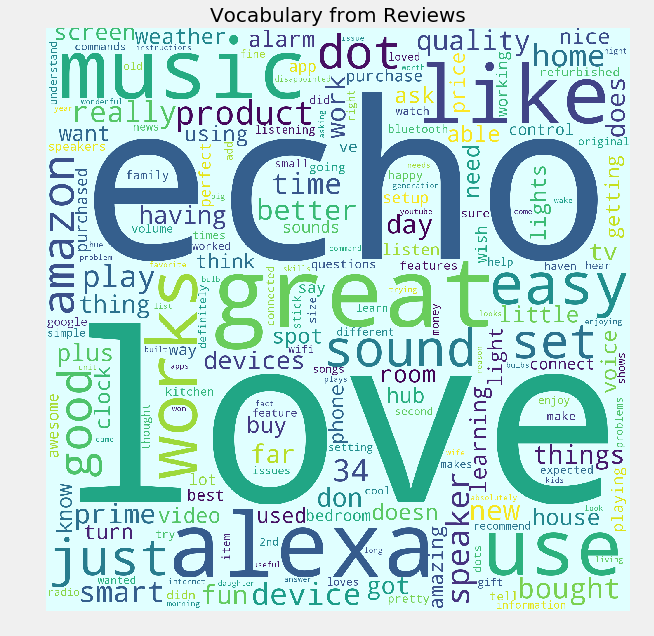

In [29]:
wordcloud = WordCloud(background_color = 'lightcyan', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from Reviews", fontsize = 20)
plt.show()

Plotting a wordscloud for the Words to see all the words, The Larger the words the larger is the frequency for that word. 

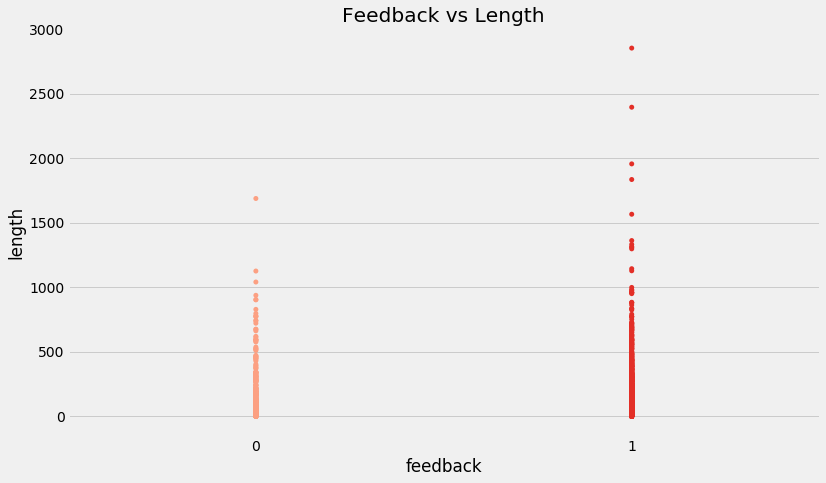

In [30]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('fivethirtyeight')

sns.stripplot(data['feedback'], data['length'], palette = 'Reds')
plt.title("Feedback vs Length")
plt.show()

### Ratings vs Length vs Variation

In [31]:
trace = go.Scatter3d(
    x = data['length'],
    y = data['rating'],
    z = data['variation'],
    name = 'Amazon Alexa',
    mode='markers',
    marker=dict(
        size=10,
        color = data['rating'],
        colorscale = 'Viridis',
    )
)
df = [trace]

layout = go.Layout(
    title = 'Length vs Variation vs Ratings',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    )
    
)
fig = go.Figure(data = df, layout = 
                layout)
iplot(fig)

## Spacy

In [32]:
import spacy
nlp = spacy.load('en')

def explain_text_entities(text):
    doc = nlp(text)
    for ent in doc.ents:
        print(f'Entity: {ent}, Label: {ent.label_}, {spacy.explain(ent.label_)}')
        
for i in range(15, 50):
    one_sentence = data['verified_reviews'][i]
    doc = nlp(one_sentence)
    spacy.displacy.render(doc, style='ent',jupyter=True)


/usr/local/anaconda/lib/python3.6/runpy.py:193: UserWarning:

[W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.



/usr/local/anaconda/lib/python3.6/runpy.py:193: UserWarning:

[W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.



/usr/local/anaconda/lib/python3.6/runpy.py:193: UserWarning:

[W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.



/usr/local/anaconda/lib/python3.6/runpy.py:193: UserWarning:

[W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.



/usr/local/anaconda/lib/python3.6/runpy.py:193: UserWarning:

[W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.



/usr/local/anaconda/lib/python3.6/runpy.py:193: UserWarning:

[W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.



/usr/local/anaconda/lib/python3.6/runpy.py:193: UserWarning:

[W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.



/usr/local/anaconda/lib/python3.6/runpy.py:193: UserWarning:

[W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.



/usr/local/anaconda/lib/python3.6/runpy.py:193: UserWarning:

[W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.



/usr/local/anaconda/lib/python3.6/runpy.py:193: UserWarning:

[W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.



/usr/local/anaconda/lib/python3.6/runpy.py:193: UserWarning:

[W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.



/usr/local/anaconda/lib/python3.6/runpy.py:193: UserWarning:

[W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.



/usr/local/anaconda/lib/python3.6/runpy.py:193: UserWarning:

[W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.



/usr/local/anaconda/lib/python3.6/runpy.py:193: UserWarning:

[W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.



In [33]:
# cleaning the texts
# importing the libraries for Natural Language Processing

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [36]:
corpus = []

for i in range(0, 3150):
    review = re.sub('[^a-zA-Z]', ' ', data['verified_reviews'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
 

In [37]:
# creating bag of words

from sklearn.feature_extraction.text import TfidfVectorizer

cv = CountVectorizer(max_features = 2500)

x = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 4].values

print(x.shape)
print(y.shape)

(3150, 2500)
(3150,)


In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2205, 2500)
(2205,)
(945, 2500)
(945,)


In [39]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)


## Modelling

**Random Forest**

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)


Training Accuracy : 0.992290249433
Testing Accuracy : 0.938624338624
[[ 27  48]
 [ 10 860]]


In [41]:
# applying k fold cross validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.929285560756
Standard Variance : 0.013585176752


In [42]:

params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}


In [43]:
# applying grid search with stratified folds

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

cv_object = StratifiedKFold(n_splits = 2)

grid = GridSearchCV(estimator = model, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
grid.fit(x_train, y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'bootstrap': [True], 'max_depth': [80, 100], 'min_samples_split': [8, 12], 'n_estimators': [100, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [44]:
print("Best Parameter Combination : {}".format(grid.best_params_))

Best Parameter Combination : {'bootstrap': True, 'max_depth': 80, 'min_samples_split': 8, 'n_estimators': 100}


In [45]:

print("Mean Cross Validation Accuracy - Train Set : {}".format(grid.cv_results_['mean_train_score'].mean()*100))
print("Mean Cross Validation Accuracy - Validation Set : {}".format(grid.cv_results_['mean_test_score'].mean()*100))

from sklearn.metrics import accuracy_score
print("Accuracy Score for Test Set :", accuracy_score(y_test, y_pred))

Mean Cross Validation Accuracy - Train Set : 96.93901140759486
Mean Cross Validation Accuracy - Validation Set : 92.27324263038548
Accuracy Score for Test Set : 0.938624338624
